# Implementácia teórie grafov v Pythone


## Úvod

V tomto [datasete](https://www.kaggle.com/giovamata/airlinedelaycauses/version/2) máme záznamy o viac ako 7 miliónoch letov z USA s viacerými premennými.

Pre účel tohto príkladu použijeme len zopár z nich (prvých 50 000 záznamov). Tieto záznamy najdete v súbore [airlines_data.csv](airlines_data.csv).

Premenné, ktoré budú pre nás v tomto prípade zaujímavé sú:

- **Origin**: letisko vzletu,
- **Dest**: letisko pristátia,
- **Distance**: vzdialenosť letiska pristátia od letiska vzletu,
- **AirTime**: čas letu (v minútach).


Najskôr si naimportujeme naše dáta pomocou modulu `pandas` a funkcie `read_csv()`. Pokiaľ nie sú potrebné všetky stĺpce z datasetu, môžeme použiť parameter `usecols` pre výber stĺpcov, ktoré sú pre nás zaujímavé.

In [2]:
import pandas as pd
data = pd.read_csv("airlines_data.csv", usecols = ["Origin", "Dest", "Distance", "AirTime"])

Teraz si môžeme pozrieť zopár prvých radkov datasetu pomocou metódy `head()`.

In [41]:
data.head()

,AirTime,Origin,Dest,Distance
0,116.0,IAD,TPA,810
1,113.0,IAD,TPA,810
2,76.0,IND,BWI,515
3,77.0,IND,BWI,515
4,87.0,IND,JAX,688


Keďže chceme využiť teóriu grafov, je potrebné dáta reprezentovať ako (di)graf, teda určiť, čo sú vrcholy a čo hrany. Nech všetky letiská reprezentujú vrcholy a letecké spojenia budú reprezentovať (orientované) hrany.

Budeme používať modul `NetworkX` pre tvorbu a vizualizáciu (di)grafov. `NetworkX` je modul okrem iného aj pre tvorbu, úpravu, štúdium štruktúry a dynamiky sietí. Dokumentáciu nájdete tu [NetworkX](https://networkx.org/documentation/stable/_downloads/networkx_reference.pdf).

Po importovaní tohto modulu vytvoríme orientované hrany a vrcholy nášho digrafu použitím uložených dát a hranám priradíme vlastnosti (atribúty):

In [18]:
import networkx as nx
G = nx.from_pandas_edgelist(data, source = "Origin", target = "Dest", edge_attr = True, create_using = nx.DiGraph())

Toto nám uloží vrcholy a hrany automaticky. Vrcholy a hrany digrafu môžeme rýchlo vypísať ako aj ich počet.

In [16]:
print(G.nodes())
print(len(G.nodes()))

['IAD', 'TPA', 'IND', 'BWI', 'JAX', 'LAS', 'MCO', 'MDW', 'PHX', 'ISP', 'FLL', 'PBI', 'RSW', 'JAN', 'HOU', 'BHM', 'BNA', 'PHL', 'ABQ', 'ALB', 'AMA', 'AUS', 'BDL', 'BOI', 'BUF', 'BUR', 'CLE', 'CMH', 'DEN', 'ELP', 'GEG', 'LAX', 'LBB', 'LIT', 'MAF', 'MCI', 'MHT', 'MSY', 'OAK', 'OKC', 'OMA', 'ONT', 'ORF', 'PDX', 'PIT', 'PVD', 'RDU', 'RNO', 'SAN', 'SAT', 'SDF', 'SEA', 'SFO', 'SJC', 'SLC', 'SMF', 'SNA', 'STL', 'TUL', 'TUS', 'DAL', 'DTW', 'HRL', 'CRP', 'ROC', 'EWR', 'IAH', 'ORD', 'SYR', 'MYR', 'GSO', 'SAV', 'CRW', 'RIC', 'FAT', 'COS', 'MRY', 'LGB', 'BFL', 'EUG', 'ICT', 'MEM', 'BTV', 'CAE', 'MKE', 'LFT', 'DFW', 'BRO', 'PWM', 'DAY', 'MSP', 'SRQ', 'CLT', 'GSP', 'TYS', 'SHV', 'CVG', 'MFE', 'ATL', 'HSV', 'DCA', 'BTR', 'CHS', 'MSN', 'LRD', 'VPS', 'AVL', 'GPT', 'LGA', 'ABE', 'BGR', 'GRR', 'MOB', 'PNS', 'CHA', 'MGM', 'TLH', 'XNA', 'GRK', 'PSP', 'LEX', 'LCH', 'BOS', 'MTJ', 'AEX', 'BPT', 'MLU', 'DSM', 'CLL', 'DAB', 'ASE', 'ATW', 'BMI', 'CAK', 'CID', 'ILM', 'JFK', 'CPR', 'DRO', 'RAP', 'EGE', 'FLG', 'FSD'

In [17]:
print(G.edges())
print(len(G.edges()))

[('IAD', 'TPA'), ('IAD', 'MDW'), ('IAD', 'MCO'), ('IAD', 'LAS'), ('IAD', 'CLE'), ('IAD', 'EWR'), ('IAD', 'IAH'), ('IAD', 'ATL'), ('IAD', 'BNA'), ('IAD', 'BOS'), ('IAD', 'CHS'), ('IAD', 'CLT'), ('IAD', 'HSV'), ('IAD', 'JAX'), ('IAD', 'LGA'), ('IAD', 'MDT'), ('IAD', 'ORF'), ('IAD', 'PIT'), ('IAD', 'PWM'), ('IAD', 'ROA'), ('IAD', 'SAT'), ('IAD', 'SAV'), ('IAD', 'SPI'), ('IAD', 'AUS'), ('IAD', 'BHM'), ('IAD', 'CAE'), ('IAD', 'GSP'), ('IAD', 'MCI'), ('IAD', 'PHL'), ('IAD', 'PVD'), ('IAD', 'RDU'), ('IAD', 'SYR'), ('IAD', 'DTW'), ('IAD', 'ROC'), ('IAD', 'BDL'), ('IAD', 'MYR'), ('IAD', 'GSO'), ('IAD', 'MHT'), ('IAD', 'DCA'), ('IAD', 'CVG'), ('TPA', 'ABQ'), ('TPA', 'ALB'), ('TPA', 'BDL'), ('TPA', 'BHM'), ('TPA', 'BNA'), ('TPA', 'BUF'), ('TPA', 'BWI'), ('TPA', 'CMH'), ('TPA', 'DEN'), ('TPA', 'FLL'), ('TPA', 'HOU'), ('TPA', 'IAD'), ('TPA', 'ISP'), ('TPA', 'JAX'), ('TPA', 'LAS'), ('TPA', 'MCI'), ('TPA', 'MDW'), ('TPA', 'MHT'), ('TPA', 'MSY'), ('TPA', 'PBI'), ('TPA', 'PHL'), ('TPA', 'PHX'), ('TPA',

Ako môžeme vidieť z prvých pár riadkov datasetu, zrejme sa dvojice (*Origin*, *Dest*) opakujú, čo by teda znamenalo, že náš digraf by mal obsahovať násobné hrany (už by nebol digrafom). Funkcia `from_pandas_edgelist()` si vie s týmto poradiť tak, že vytvorí len unikátne hrany a priradí im najmenšie možné hodnoty atribútov. Poďme sa sami o tom presvedčiť napr. pre dvojicu `("IAD", "TPA")`. 

In [19]:
# najskôr zistíme atribúty všetkých hrán
air_times = nx.get_edge_attributes(G, "AirTime")
distances = nx.get_edge_attributes(G, "Distance")
# teraz vypíšeme atribúty len špecifickej hrany
print(air_times[("IAD","TPA")])
print(distances[("IAD","TPA")])

106.0
810


Teda v našom datasete máme najkratší z *IAD* do *TPA* s časom 106 minút. Vzdialenosť medzi letiskami je nemenná.

Teraz si nakreslime a vizualizujme digraf pomocou modulu `matplotlib` a funkcií `draw_random()`, `draw_networkx()` a `draw_circular()`.

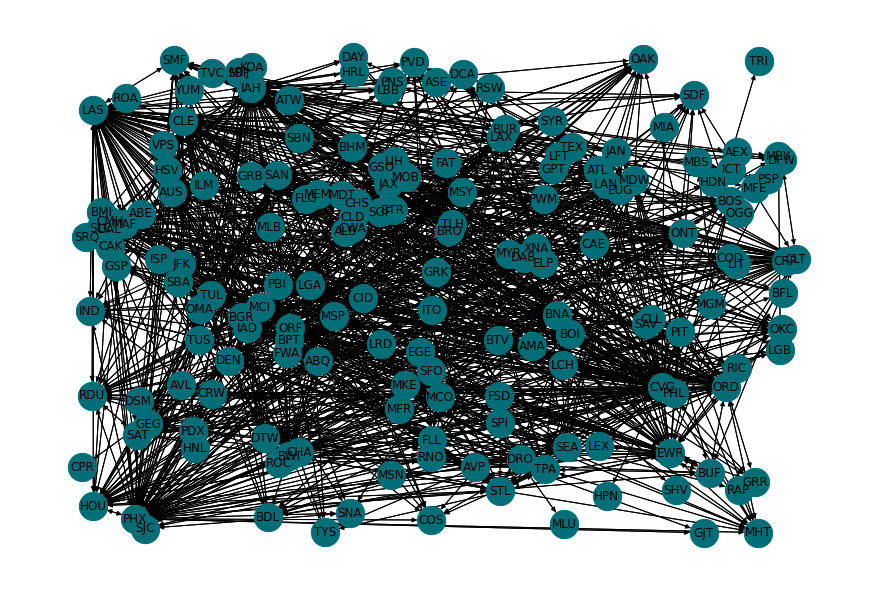

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
nx.draw_random(G, with_labels = True, node_size = 800, node_color = "#006D77")

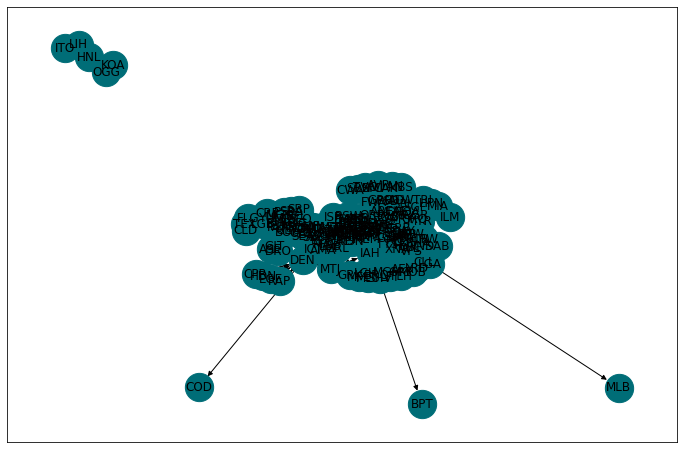

In [31]:
plt.figure(figsize = (12, 8))
nx.draw_networkx(G, with_labels = True, node_size = 800, node_color = "#006D77")

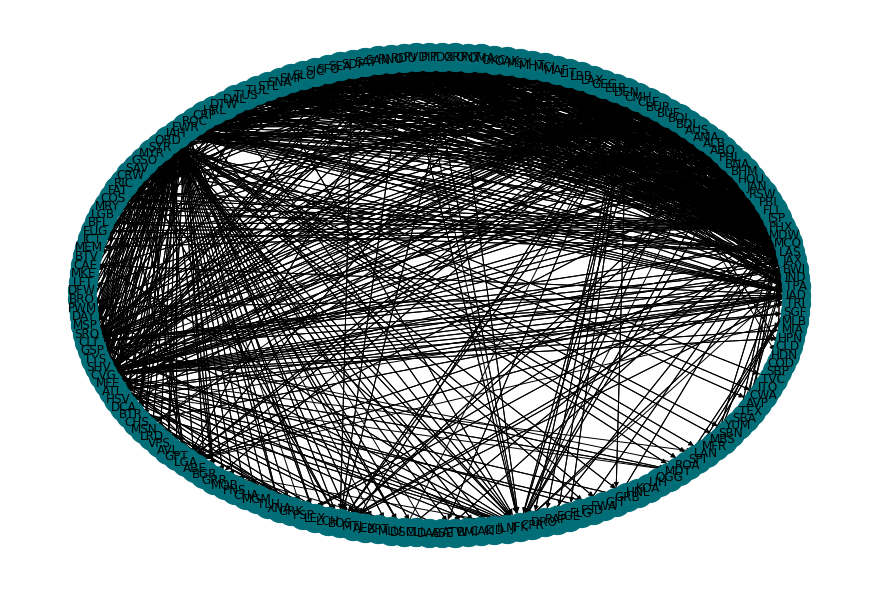

In [32]:
plt.figure(figsize = (12, 8))
nx.draw_circular(G, with_labels = True, node_size = 800, node_color = "#006D77")

## Štatistická charakterizácia digrafu

Základné informácie o (di)grafe možno získať pomocou funkcie `info()`.

In [39]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 173
Number of edges: 1921
Average in degree:  11.1040
Average out degree:  11.1040


Rovnako jednoducho môžeme zistiť aj iné štatistické charakterizácie (di)grafu.

Hustota digrafu: 0.06455840838822423


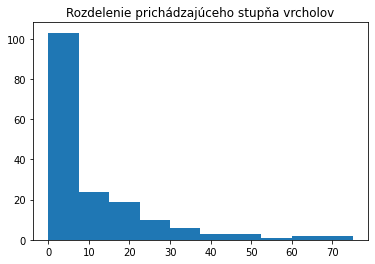

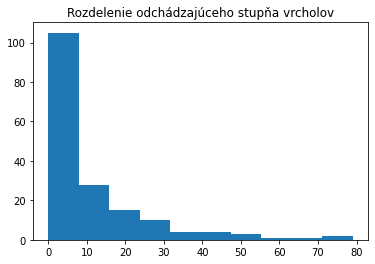

Centralita blízkosti vrcholu IAD: 0.5060585534733198
Centralita prepojenosti vrcholu IAD: 0.03560516332929431
Lokálny zhlukový koeficient vrcholu IAD: 0.289612097304405
Zhlukový koeficient podľa Watts & Strogatz: 0.4661931176399616
Reciprocita: 0.980739198334201


In [76]:
# Hustota digrafu
print(f"Hustota digrafu: {nx.density(G)}")

# Rozdelenie prichádzajúceho stupňa vrcholov
plt.hist(dict(G.in_degree()).values())
plt.title("Rozdelenie prichádzajúceho stupňa vrcholov")
plt.show()

# Rozdelenie odchádzajúceho stupňa vrcholov
plt.hist(dict(G.out_degree()).values())
plt.title("Rozdelenie odchádzajúceho stupňa vrcholov")
plt.show()

# Centralita blízkosti vrcholu IAD
print(f"Centralita blízkosti vrcholu IAD: {nx.closeness_centrality(G)['IAD']}")

# Centralita prepojenosti vrcholu IAD
print(f"Centralita prepojenosti vrcholu IAD: {nx.betweenness_centrality(G)['IAD']}")

# Lokálny zhlukový koeficient vrcholu IAD
clustering_coefficients = nx.clustering(G)
print(f"Lokálny zhlukový koeficient vrcholu IAD: {clustering_coefficients['IAD']}")

# Zhlukový koeficient podľa Watts & Strogatz
print(f"Zhlukový koeficient podľa Watts & Strogatz: {sum(clustering_coefficients.values())/len(clustering_coefficients)}")

# Reciprocita
print(f"Reciprocita: {nx.reciprocity(G)}")


## Dijkstrov algoritmus
Predpokladajme, že pasažier chce vziať najkratšiu cestu (v zmysle vzdialenosti) medzi **IAD** (Washington) a **SAN** (San Diego). V tomto nám pomôže teória grafov. Použijeme *Dijkstrov algoritmus*.

In [82]:
celkova_vzdialenost, najkratsia_cesta_vzialenost = nx.single_source_dijkstra(G, source = "IAD", target = "SAN", weight = "Distance")
print(f"Cesta, ktorou by mal pasažier cestovať je: {' -> '.join(najkratsia_cesta_vzialenost)}")
print(f"Celková precestovaná vzdialenosť je: {celkova_vzdialenost}")

Cesta, ktorou by mal pasažier cestovať je: IAD -> CVG -> STL -> ABQ -> SAN
Celková precestovaná vzdialenosť je: 2257


Toto je najkratšia možná cesta (z našich dát) medzi dvoma letiskami na základe ich vzdialenosti.

Poďme sa teraz pozrieť na najkratšiu cestu vzhľadom na čas strávený vo vzduchu.

In [83]:
celkovy_cas, najkratsia_cesta_cas = nx.single_source_dijkstra(G, source = "IAD", target = "SAN", weight = "AirTime")
print(f"Cesta, ktorou by mal pasažier cestovať je: {' -> '.join(najkratsia_cesta_cas)}")
print(f"Celkový čas strávený vo vzduchu: {celkovy_cas}")

Cesta, ktorou by mal pasažier cestovať je: IAD -> BNA -> SAN
Celkový čas strávený vo vzduchu: 326.0


## Floydov algoritmus

Pokiaľ máme mnoho pasažierov s rôznym miestom odletu a rôznymi destináciami, je na mieste uvažovať (vzhľadom na nemennosť siete) o hľadaní všetkých najkratších ciest (z každého miesta odletu do každej inej destinácie) súčasne namiesto hľadania najkratšej cesty pre všetky dvojice oddelene. V tomto nám pomôže *Floydov algoritmus*.

In [102]:
floyd_predchodcovia_vzdialenost, floyd_najkratsie_cesty_vzdialenost =  nx.floyd_warshall_predecessor_and_distance(G, weight = "Distance")
floyd_predchodcovia_cas, floyd_najkratsie_cesty_cas =  nx.floyd_warshall_predecessor_and_distance(G, weight = "AirTime")

Do stávame premenné typu `dict`, kde každý vrchol je kľúčom a má hodnotu typu `dict` s kľúčmi všetkých ostatných vrcholov. Ich hodnoty sú pre prvú premennú predchodca a pre druhú premennú hodnota najkratšej cesty.

Predpokladajme, že máme opäť pasažiera, ktorý sa chce dostať z **IAD** do **SAN**. Minimálne hodnoty najkratších ciest vieme získať nasledovne:

In [110]:
start = "IAD"
ciel = "SAN"
print(f"Celková precestovaná vzdialenosť je: {floyd_najkratsie_cesty_vzdialenost[start][ciel]}")
print(f"Celkový čas strávený vo vzduchu: {floyd_najkratsie_cesty_cas[start][ciel]}")

Celková precestovaná vzdialenosť je: 2257
Celkový čas strávený vo vzduchu: 326.0


Vypísanie najkratších ciesť je o niečo zložitejšie.

In [114]:
# najkratšia vzdialenosť
cesta_vzdialenost = [ciel]
while cesta_vzdialenost[0] != start:
    predchodca_vzialenost = floyd_predchodcovia_vzdialenost[start][cesta_vzdialenost[0]]
    cesta_vzdialenost.insert(0,predchodca_vzialenost)
print(f"Cesta, ktorou by mal pasažier cestovať je: {' -> '.join(cesta_vzdialenost)}")

# najkratší čas
cesta_cas = [ciel]
while cesta_cas[0] != start:
    predchodca_cas = floyd_predchodcovia_cas[start][cesta_cas[0]]
    cesta_cas.insert(0,predchodca_cas)
print(f"Cesta, ktorou by mal pasažier cestovať je: {' -> '.join(cesta_cas)}")

Cesta, ktorou by mal pasažier cestovať je: IAD -> CVG -> STL -> ABQ -> SAN
Cesta, ktorou by mal pasažier cestovať je: IAD -> BNA -> SAN


Všimnime si, že `while` cyklus je podobný pre obe najkratšie cesty s rozdielom v premenných. To je príležitosť pre vytvorenie vlastnej funkcie.

In [117]:
def najkratsia_cesta(start, ciel, predchodcovia):
    cesta = [ciel]
    while cesta[0] != start:
        predchodca = predchodcovia[start][cesta[0]]
        cesta.insert(0, predchodca)
    return cesta

Teraz nám stačí použiť funkciu `najkratsia_cesta()`, ktorá nám vráti zoznam po sebe nasledujúcich letísk od miesta vzletu až po konečnú destináciu.

In [118]:
print(f"Cesta, ktorou by mal pasažier cestovať je: {' -> '.join(najkratsia_cesta(start, ciel, floyd_predchodcovia_vzdialenost))}")
print(f"Cesta, ktorou by mal pasažier cestovať je: {' -> '.join(najkratsia_cesta(start, ciel, floyd_predchodcovia_cas))}")

Cesta, ktorou by mal pasažier cestovať je: IAD -> CVG -> STL -> ABQ -> SAN
Cesta, ktorou by mal pasažier cestovať je: IAD -> BNA -> SAN
